# Data exploration

In this jupyter notebook, we will try to get an insight on the data.

In [1]:
from deep_learning_project.load_data import basic_load, balanced_load, imbalanced_load
import matplotlib.pyplot as plt
from collections import Counter

c:\python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
valid_size = 0.2
batch_size = 32

# Basic Load

In [3]:
data = basic_load(valid_size=valid_size, batch_size=batch_size, device='cpu')
train_loader = data[0]
valid_loader = data[1]
test_loader = data[2]
classes = data[3]

{}


In [4]:
cnt_train = Counter()
cnt_valid = Counter()
cnt_test = Counter()

for x, y in train_loader:
    cnt_train.update(y.numpy())

for x, y in valid_loader:
    cnt_valid.update(y.numpy())

for x, y in test_loader:
    cnt_test.update(y.numpy())



print(cnt_train)
print(cnt_valid)
print(cnt_test)


Counter({1: 51754, 0: 21622})
Counter({1: 13016, 0: 5328})
Counter({0: 6831, 1: 797})


In [5]:
train_total = sum(list(cnt_train.values()))
valid_total = sum(list(cnt_valid.values()))
test_total = sum(list(cnt_test.values()))

train_0_total_ratio = cnt_train[0]/train_total
valid_0_total_ratio = cnt_valid[0]/valid_total
test_0_total_ratio = cnt_test[0]/test_total

train_0_1_ratio = cnt_train[0]/cnt_train[1]
valid_0_1_ratio = cnt_valid[0]/cnt_valid[1]
test_0_1_ratio = cnt_test[0]/cnt_test[1]

print('cnt_train[0]={}'.format(cnt_train[0]))
print('cnt_train[1]={}'.format(cnt_train[1]))
print('cnt_valid[0]={}'.format(cnt_valid[0]))
print('cnt_valid[1]={}'.format(cnt_valid[1]))
print('cnt_test[0]={}'.format(cnt_test[0]))
print('cnt_test[1]={}'.format(cnt_test[1]))

print('Ratio between noface and total pop in training dataset : {:.2%}'.format(train_0_total_ratio))
print('Ratio between noface and total pop in validation dataset : {:.2%}'.format(valid_0_total_ratio))
print('Ratio between noface and total pop in testing dataset : {:.2%}'.format(test_0_total_ratio))
print('---')
print('Ratio between noface and face in training dataset : {:.2%}'.format(train_0_1_ratio))
print('Ratio between noface and face in validation dataset : {:.2%}'.format(valid_0_1_ratio))
print('Ratio between noface and face in testing dataset : {:.2%}'.format(test_0_1_ratio))

cnt_train[0]=21622
cnt_train[1]=51754
cnt_valid[0]=5328
cnt_valid[1]=13016
cnt_test[0]=6831
cnt_test[1]=797
Ratio between noface and total pop in training dataset : 29.47%
Ratio between noface and total pop in validation dataset : 29.04%
Ratio between noface and total pop in testing dataset : 89.55%
---
Ratio between noface and face in training dataset : 41.78%
Ratio between noface and face in validation dataset : 40.93%
Ratio between noface and face in testing dataset : 857.09%


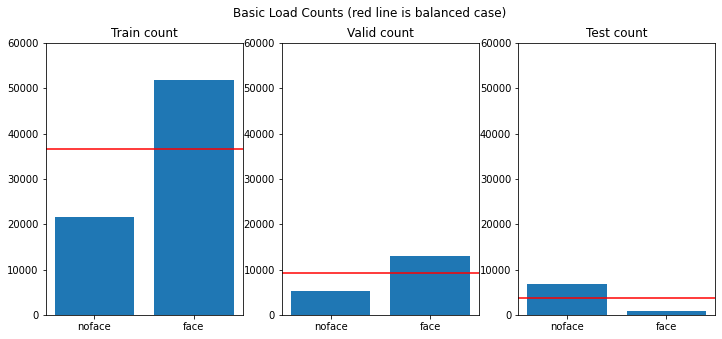

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5))

axs[0].bar(classes, [cnt_train[x] for x in [0, 1]])
axs[0].set_ybound(0, 60000)
axs[0].axhline(0.5*train_total, color='r')
axs[0].set_title('Train count')

axs[1].bar(classes, [cnt_valid[x] for x in [0, 1]])
axs[1].set_ybound(0, 60000)
axs[1].axhline(0.5*valid_total, color='r')
axs[1].set_title('Valid count')

axs[2].bar(classes, [cnt_test[x] for x in [0, 1]])
axs[2].set_ybound(0, 60000)
axs[2].axhline(0.5*test_total, color='r')
axs[2].set_title('Test count')

fig.suptitle('Basic Load Counts (red line is balanced case)')

plt.show()

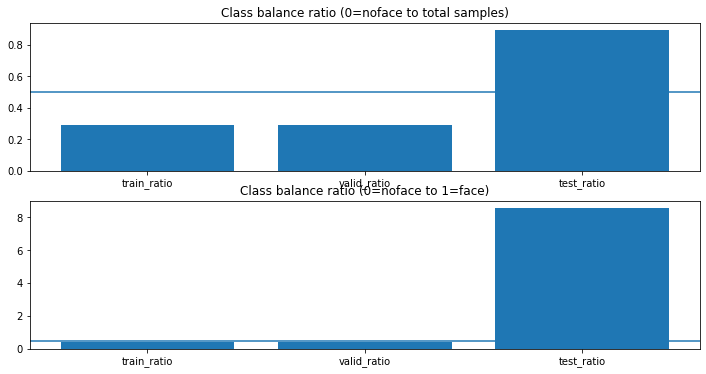

In [7]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,6))

axs[0].bar(['train_ratio', 'valid_ratio', 'test_ratio'], [train_0_total_ratio, valid_0_total_ratio, test_0_total_ratio])
axs[0].axhline(0.5)
axs[0].set_title('Class balance ratio (0=noface to total samples)')

axs[1].bar(['train_ratio', 'valid_ratio', 'test_ratio'], [train_0_1_ratio, valid_0_1_ratio, test_0_1_ratio])
axs[1].axhline(0.5)
axs[1].set_title('Class balance ratio (0=noface to 1=face)')

plt.show()

# Balanced load

In [8]:
data = balanced_load(valid_size=valid_size, batch_size=batch_size, device='cpu')
train_loader = data[0]
valid_loader = data[1]
test_loader = data[2]
classes = data[3]

73376
18344


In [9]:
cnt_train = Counter()
cnt_valid = Counter()
cnt_test = Counter()

for x, y in train_loader:
    cnt_train.update(y.numpy())

for x, y in valid_loader:
    cnt_valid.update(y.numpy())

for x, y in test_loader:
    cnt_test.update(y.numpy())

print(cnt_train)
print(cnt_valid)
print(cnt_test)

Counter({1: 51816, 0: 21560})
Counter({1: 12954, 0: 5390})
Counter({0: 6831, 1: 797})


In [10]:
train_total = sum(list(cnt_train.values()))
valid_total = sum(list(cnt_valid.values()))
test_total = sum(list(cnt_test.values()))

train_0_total_ratio = cnt_train[0]/train_total
valid_0_total_ratio = cnt_valid[0]/valid_total
test_0_total_ratio = cnt_test[0]/test_total

train_0_1_ratio = cnt_train[0]/cnt_train[1]
valid_0_1_ratio = cnt_valid[0]/cnt_valid[1]
test_0_1_ratio = cnt_test[0]/cnt_test[1]

print('cnt_train[0]={}'.format(cnt_train[0]))
print('cnt_train[1]={}'.format(cnt_train[1]))
print('cnt_valid[0]={}'.format(cnt_valid[0]))
print('cnt_valid[1]={}'.format(cnt_valid[1]))
print('cnt_test[0]={}'.format(cnt_test[0]))
print('cnt_test[1]={}'.format(cnt_test[1]))

print('Ratio between noface and total pop in training dataset : {:.2%}'.format(train_0_total_ratio))
print('Ratio between noface and total pop in validation dataset : {:.2%}'.format(valid_0_total_ratio))
print('Ratio between noface and total pop in testing dataset : {:.2%}'.format(test_0_total_ratio))
print('---')
print('Ratio between noface and face in training dataset : {:.2%}'.format(train_0_1_ratio))
print('Ratio between noface and face in validation dataset : {:.2%}'.format(valid_0_1_ratio))
print('Ratio between noface and face in testing dataset : {:.2%}'.format(test_0_1_ratio))

cnt_train[0]=21560
cnt_train[1]=51816
cnt_valid[0]=5390
cnt_valid[1]=12954
cnt_test[0]=6831
cnt_test[1]=797
Ratio between noface and total pop in training dataset : 29.38%
Ratio between noface and total pop in validation dataset : 29.38%
Ratio between noface and total pop in testing dataset : 89.55%
---
Ratio between noface and face in training dataset : 41.61%
Ratio between noface and face in validation dataset : 41.61%
Ratio between noface and face in testing dataset : 857.09%


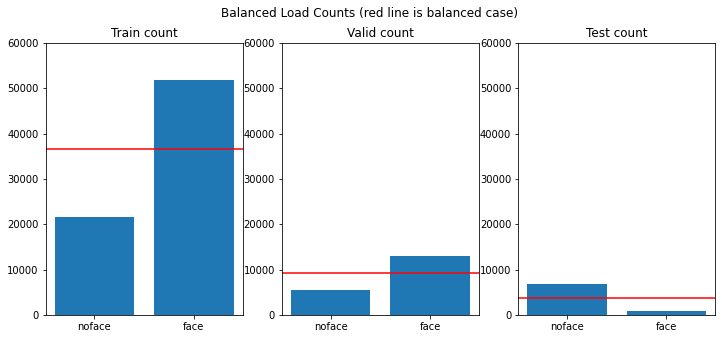

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5))

axs[0].bar(classes, [cnt_train[x] for x in [0, 1]])
axs[0].set_ybound(0, 60000)
axs[0].axhline(0.5*train_total, color='r')
axs[0].set_title('Train count')

axs[1].bar(classes, [cnt_valid[x] for x in [0, 1]])
axs[1].set_ybound(0, 60000)
axs[1].axhline(0.5*valid_total, color='r')
axs[1].set_title('Valid count')

axs[2].bar(classes, [cnt_test[x] for x in [0, 1]])
axs[2].set_ybound(0, 60000)
axs[2].axhline(0.5*test_total, color='r')
axs[2].set_title('Test count')

fig.suptitle('Balanced Load Counts (red line is balanced case)')

plt.show()

# Imbalanced load

In [12]:
data = imbalanced_load(valid_size=valid_size, batch_size=batch_size, device='cpu')
train_loader = data[0]
valid_loader = data[1]
test_loader = data[2]
classes = data[3]

In [13]:
cnt_train = Counter()
cnt_valid = Counter()
cnt_test = Counter()

for x, y in train_loader:
    cnt_train.update(y.numpy())

for x, y in valid_loader:
    cnt_valid.update(y.numpy())

for x, y in test_loader:
    cnt_test.update(y.numpy())

print(cnt_train)
print(cnt_valid)
print(cnt_test)

Counter({1: 36887, 0: 36489})
Counter({1: 12945, 0: 5399})
Counter({0: 6831, 1: 797})


In [14]:
train_total = sum(list(cnt_train.values()))
valid_total = sum(list(cnt_valid.values()))
test_total = sum(list(cnt_test.values()))

train_0_total_ratio = cnt_train[0]/train_total
valid_0_total_ratio = cnt_valid[0]/valid_total
test_0_total_ratio = cnt_test[0]/test_total

train_0_1_ratio = cnt_train[0]/cnt_train[1]
valid_0_1_ratio = cnt_valid[0]/cnt_valid[1]
test_0_1_ratio = cnt_test[0]/cnt_test[1]

print('cnt_train[0]={}'.format(cnt_train[0]))
print('cnt_train[1]={}'.format(cnt_train[1]))
print('cnt_valid[0]={}'.format(cnt_valid[0]))
print('cnt_valid[1]={}'.format(cnt_valid[1]))
print('cnt_test[0]={}'.format(cnt_test[0]))
print('cnt_test[1]={}'.format(cnt_test[1]))

print('Ratio between noface and total pop in training dataset : {:.2%}'.format(train_0_total_ratio))
print('Ratio between noface and total pop in validation dataset : {:.2%}'.format(valid_0_total_ratio))
print('Ratio between noface and total pop in testing dataset : {:.2%}'.format(test_0_total_ratio))
print('---')
print('Ratio between noface and face in training dataset : {:.2%}'.format(train_0_1_ratio))
print('Ratio between noface and face in validation dataset : {:.2%}'.format(valid_0_1_ratio))
print('Ratio between noface and face in testing dataset : {:.2%}'.format(test_0_1_ratio))

cnt_train[0]=36489
cnt_train[1]=36887
cnt_valid[0]=5399
cnt_valid[1]=12945
cnt_test[0]=6831
cnt_test[1]=797
Ratio between noface and total pop in training dataset : 49.73%
Ratio between noface and total pop in validation dataset : 29.43%
Ratio between noface and total pop in testing dataset : 89.55%
---
Ratio between noface and face in training dataset : 98.92%
Ratio between noface and face in validation dataset : 41.71%
Ratio between noface and face in testing dataset : 857.09%


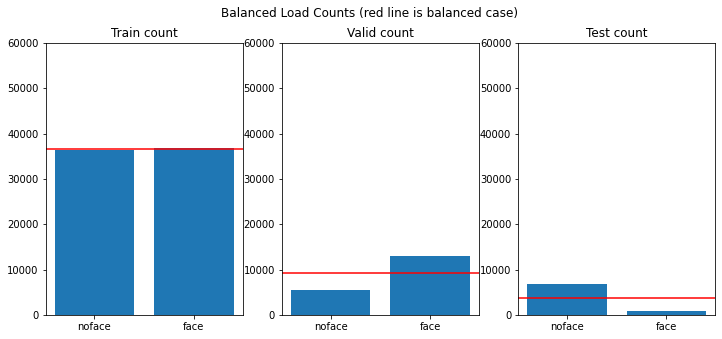

In [15]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5))

axs[0].bar(classes, [cnt_train[x] for x in [0, 1]])
axs[0].set_ybound(0, 60000)
axs[0].axhline(0.5*train_total, color='r')
axs[0].set_title('Train count')

axs[1].bar(classes, [cnt_valid[x] for x in [0, 1]])
axs[1].set_ybound(0, 60000)
axs[1].axhline(0.5*valid_total, color='r')
axs[1].set_title('Valid count')

axs[2].bar(classes, [cnt_test[x] for x in [0, 1]])
axs[2].set_ybound(0, 60000)
axs[2].axhline(0.5*test_total, color='r')
axs[2].set_title('Test count')

fig.suptitle('Balanced Load Counts (red line is balanced case)')

plt.show()